In [ ]:
# Import libraries
from PIL import Image

# Load image
image1 = Image.open('/content/Img.png')

# Plotting the histograms of each channel of image

In [ ]:
from matplotlib import pyplot as plt
def plot_histogram(image):
    # Split the R, G and B channels
    imageR, imageG, imageB = image.split()
    
    # Plot the histigrams
    plt.figure(figsize = (20, 10))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    plt.title("Histogram of image")
    plt.plot(imageR.histogram(), color='red') 
    plt.plot(imageG.histogram(), color='green')
    plt.plot(imageB.histogram(), color='blue')
    plt.show()

plot_histogram(image1) 

- By plotting channel wise histogram, we observered that red channel is usually concentrated on the left side of the histogram and in cases of images with greenish appearance like the above, blue channel also exhibits the same property.

# Plotting R, G, and B components of the image

In [ ]:
import numpy as np
def channel_split(image):
    # Split the R, G and B channels
    imageR, imageG, imageB = image.split()
    x, y=image.size
    Rchannel = np.zeros((y, x, 3), dtype = "uint8")
    Bchannel = np.zeros((y, x, 3), dtype = "uint8")
    Gchannel = np.zeros((y, x, 3), dtype = "uint8")
    # Create individual components image
    Rchannel[:, :, 0]= imageR;
    Bchannel[:, :, 1]= imageG;
    Gchannel[:, :, 2]= imageB;
    # Convert array to image
    Rchannel = Image.fromarray(Rchannel) 
    Bchannel = Image.fromarray(Bchannel) 
    Gchannel = Image.fromarray(Gchannel) 
    
    # Plot R, G and B components
    plt.figure(figsize = (20, 20))  
    plt.subplot(1, 4, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.subplot(1, 4, 2)
    plt.title("Red Component")
    plt.imshow(Rchannel)
    plt.subplot(1, 4, 3)
    plt.title("Green Component")
    plt.imshow(Bchannel) 
    plt.subplot(1, 4, 4)
    plt.title("Blue Component")
    plt.imshow(Gchannel) 
    plt.show()
    
channel_split(image1)

- By plotting channel wise RGB image component, we observered that green channel is least degraded channel as compared to Red and Blue 

# Color Correction

## Step 1: Compensating R and B(when required) channel

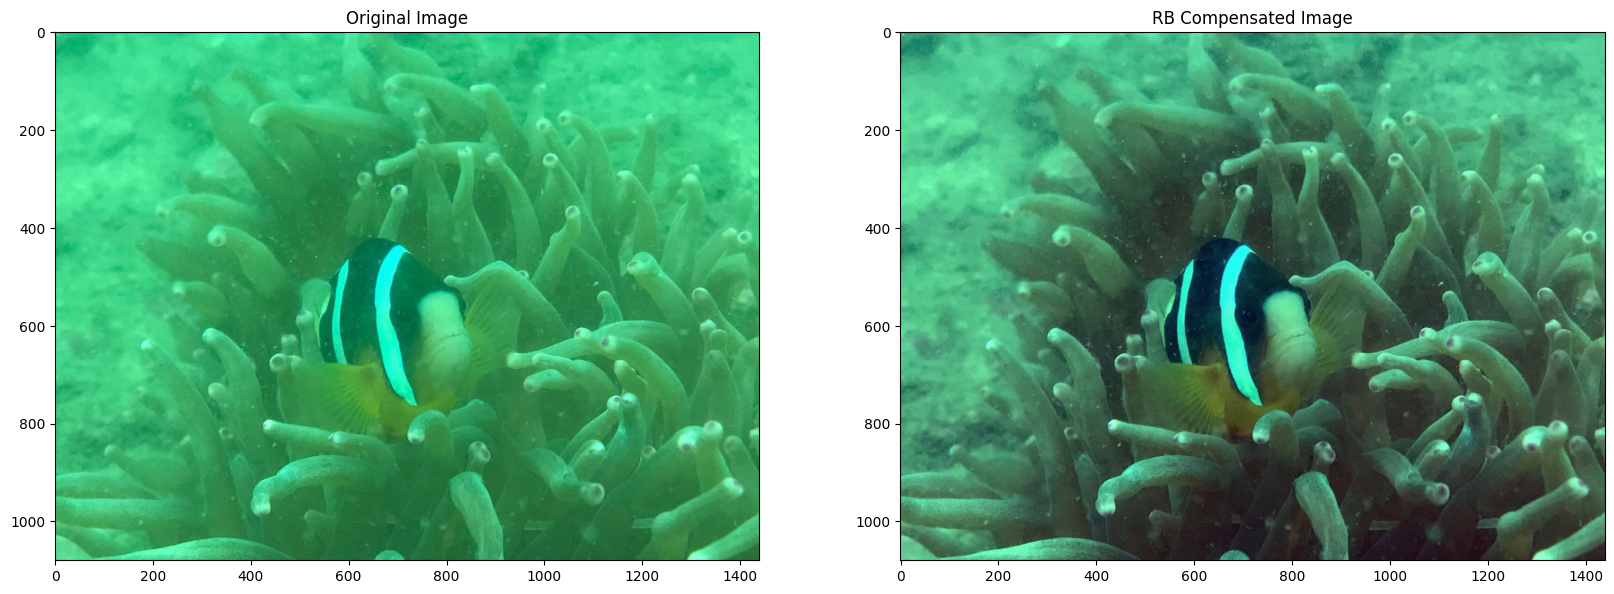

In [ ]:
from PIL import Image, ImageStat
# flag = 0 for Red, Blue Compensation via green channel
# flag = 1 for Red Compensation via green channel
def compensate_RB(image, flag):
    # Splitting the image into R, G and B components
    imager, imageg, imageb = image.split()
    
    # Get maximum and minimum pixel value
    minR, maxR = imager.getextrema()
    minG, maxG = imageg.getextrema()
    minB, maxB = imageb.getextrema()
    
    # Convert to array
    imageR = np.array(imager,np.float64)
    imageG = np.array(imageg,np.float64)
    imageB = np.array(imageb,np.float64)
    
    x,y = image.size
    
    # Normalizing the pixel value to range (0, 1)
    for i in range(0, y):
        for j in range(0, x):
            imageR[i][j]=(imageR[i][j]-minR)/(maxR-minR)
            imageG[i][j]=(imageG[i][j]-minG)/(maxG-minG)
            imageB[i][j]=(imageB[i][j]-minB)/(maxB-minB)
    
    # Getting the mean of each channel
    meanR=np.mean(imageR)
    meanG=np.mean(imageG)
    meanB=np.mean(imageB)
    

    # Compensate Red and Blue channel
    if flag == 0:
        for i in range(y):
            for j in range(x):
                imageR[i][j]=int((imageR[i][j]+(meanG-meanR)*(1-imageR[i][j])*imageG[i][j])*maxR)
                imageB[i][j]=int((imageB[i][j]+(meanG-meanB)*(1-imageB[i][j])*imageG[i][j])*maxB)

        # Scaling the pixel values back to the original range
        for i in range(0, y):
            for j in range(0, x):
                imageG[i][j]=int(imageG[i][j]*maxG)
   
    # Compensate Red channel
    if flag == 1:
        for i in range(y):
            for j in range(x):
                imageR[i][j]=int((imageR[i][j]+(meanG-meanR)*(1-imageR[i][j])*imageG[i][j])*maxR)

        # Scaling the pixel values back to the original range
        for i in range(0, y):
            for j in range(0, x):
                imageB[i][j]=int(imageB[i][j]*maxB)
                imageG[i][j]=int(imageG[i][j]*maxG)
            
    # Create the compensated image
    compensateIm = np.zeros((y, x, 3), dtype = "uint8")
    compensateIm[:, :, 0]= imageR;
    compensateIm[:, :, 1]= imageG;
    compensateIm[:, :, 2]= imageB;
    
    # Plotting the compensated image
    plt.figure(figsize = (20, 20))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    plt.title("RB Compensated Image")
    plt.imshow(compensateIm) 
    plt.show()
    compensateIm=Image.fromarray(compensateIm)
    
    return compensateIm

compensatedimage1=compensate_RB(image1, 0)

## Step 2: White balancing using Gray World Algorithm

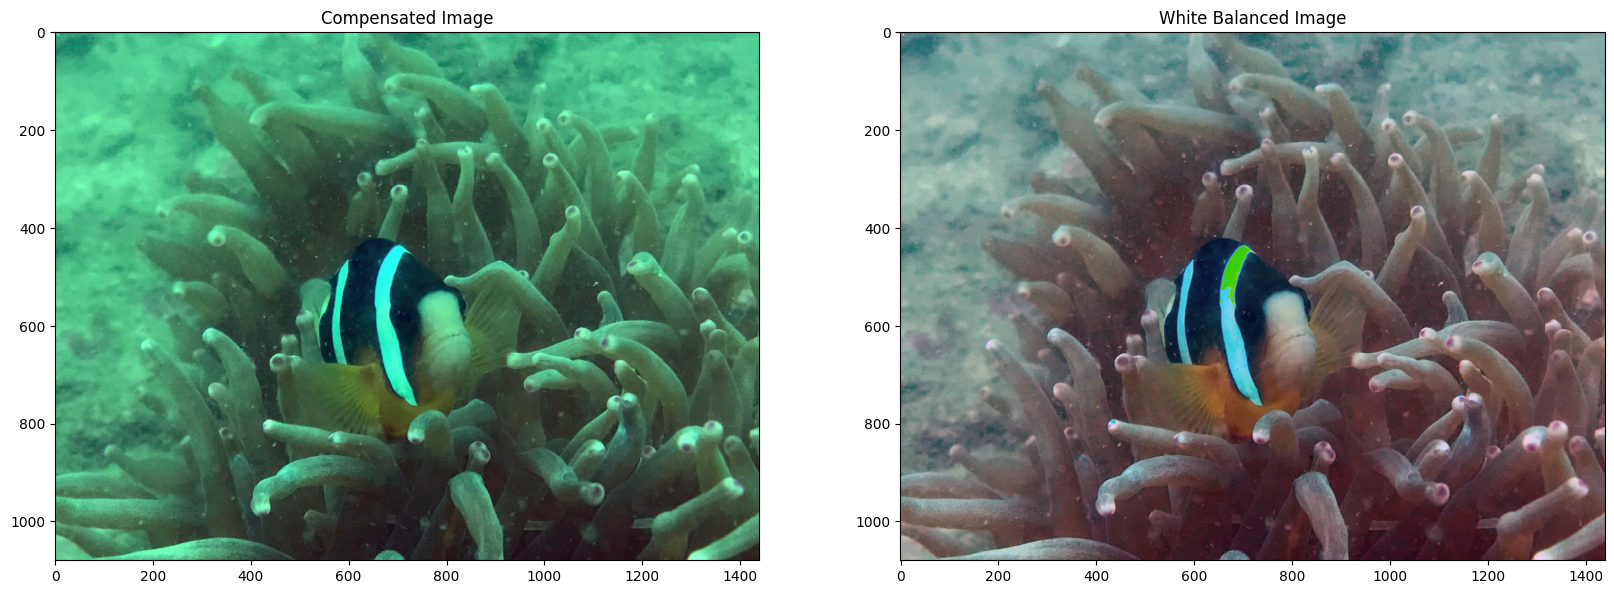

In [ ]:
def gray_world(image):
    # Splitting the image into R, G and B components
    imager, imageg, imageb = image.split()
    
    # Form a grayscale image
    imagegray=image.convert('L')
    
    # Convert to array
    imageR = np.array(imager,np.float64)
    imageG = np.array(imageg,np.float64)
    imageB = np.array(imageb,np.float64)
    imageGray=np.array(imagegray, np.float64)
    
    x,y = image.size
    
    # Get mean value of pixels     
    meanR=np.mean(imageR)
    meanG=np.mean(imageG)
    meanB=np.mean(imageB)
    meanGray=np.mean(imageGray)
    
    # Gray World Algorithm  
    for i in range(0, y):
        for j in range(0, x):
            imageR[i][j]=int(imageR[i][j]*meanGray/meanR)
            imageG[i][j]=int(imageG[i][j]*meanGray/meanG)
            imageB[i][j]=int(imageB[i][j]*meanGray/meanB)
    
    # Create the white balanced image
    whitebalancedIm = np.zeros((y, x, 3), dtype = "uint8")
    whitebalancedIm[:, :, 0]= imageR;
    whitebalancedIm[:, :, 1]= imageG;
    whitebalancedIm[:, :, 2]= imageB;
    
    # Plotting the compensated image
    plt.figure(figsize = (20, 20))
    plt.subplot(1, 2, 1)
    plt.title("Compensated Image")
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    plt.title("White Balanced Image")
    plt.imshow(whitebalancedIm) 
    plt.show()
    
    return Image.fromarray(whitebalancedIm)

whitebalanced1=gray_world(compensatedimage1)